# 5. Deep Neural networks - Initialization
<p>We'll explore how initialization techniques help avoid vanishing or exploding gradients.</p>

<ul>
    <li><a href="#data">Data</a></li>
    <li><a href="#model">Model: Initialize weights equally, and set bias to zero</a></li>
    <li><a href="#training">Training</a></li>
    <li><a href="#results">Exploring MSE as loss criterion</a></li>
</ul>

In [2]:
import torch 
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

In [3]:
# Helper functions

def PlotStuff(X, Y, model, epoch, leg=True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

## <a name="data" id="data">Data</a>

In [4]:
# Synthetic data

X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

Text(0, 0.5, 'y')

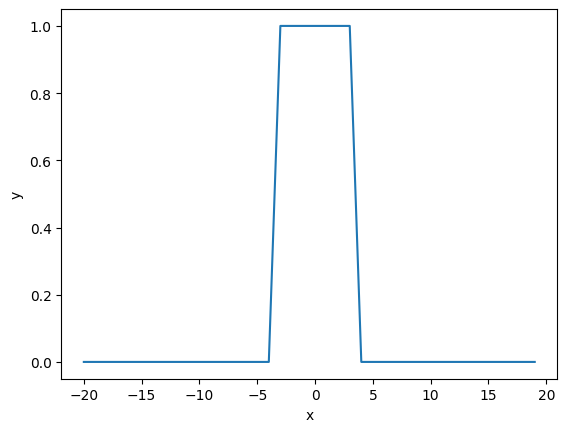

In [5]:
plt.plot(X.numpy(), Y.numpy())
plt.xlabel('x'); plt.ylabel('y')

## <a name="model" id="model">Model: Neural network and parameters</a>

In [6]:
# Create the model class

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # Hidden layer 
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        # Define the first linear layer as an attribute; not a good practice!
        self.a1 = None
        self.l1 = None
        self.l2=None
    
    # Prediction
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2=self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

In [7]:
# The loss function
def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

In [8]:
# NN definition
# size of input 
D_in = 1
# size of hidden layer 
H = 2
# number of outputs 
D_out = 1
# learning rate 
learning_rate = 0.1
# create the model 
model = Net(D_in, H, D_out)


In [9]:
# Show default PyTorch initialization
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.0075],
                      [ 0.5364]])),
             ('linear1.bias', tensor([-0.8230, -0.7359])),
             ('linear2.weight', tensor([[-0.2723,  0.1896]])),
             ('linear2.bias', tensor([-0.0140]))])

In [10]:
# Manually initialize weights to 1, and set bias to zero
model.state_dict()['linear1.weight'][0]=1.0
model.state_dict()['linear1.weight'][1]=1.0
model.state_dict()['linear1.bias'][0]=0.0
model.state_dict()['linear1.bias'][1]=0.0
model.state_dict()['linear2.weight'][0]=1.0
model.state_dict()['linear2.bias'][0]=0.0
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.],
                      [1.]])),
             ('linear1.bias', tensor([0., 0.])),
             ('linear2.weight', tensor([[1., 1.]])),
             ('linear2.bias', tensor([0.]))])

In [11]:
# Optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## <a name="training" id="training">Training</a>
**May take a few minutes**

In [12]:
def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total=0
    for epoch in range(epochs):
        total=0
        for y, x in zip(Y, X):
            yhat = model(x)
            
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            # Cumulative loss 
            total+=loss.item() 
        cost.append(total)

        if epoch % 300 == 0:  # Visualization frequency
            PlotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
            plt.scatter(
                model.a1.detach().numpy()[:, 0],
                model.a1.detach().numpy()[:, 1],
                c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost

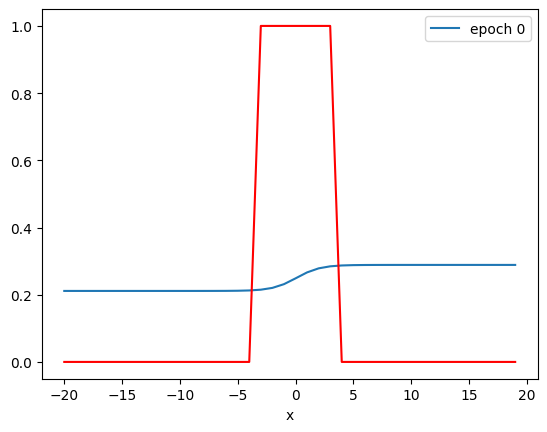

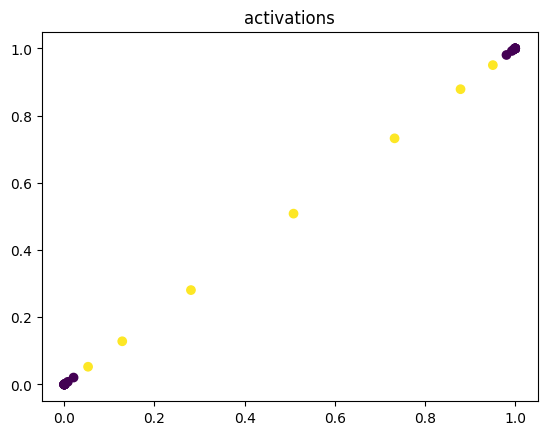

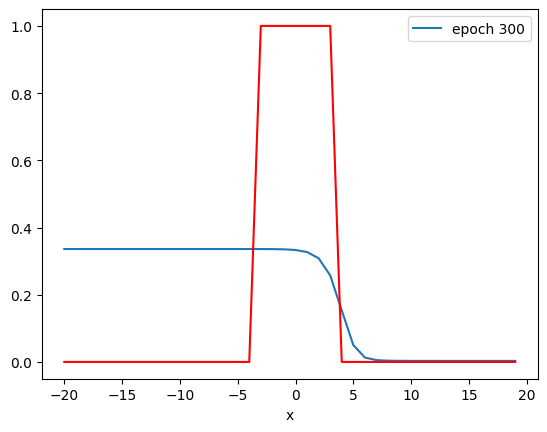

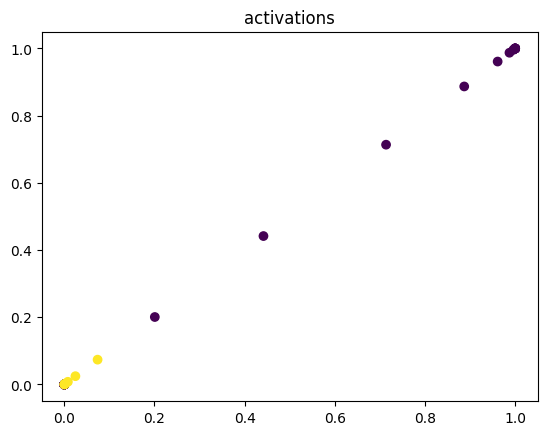

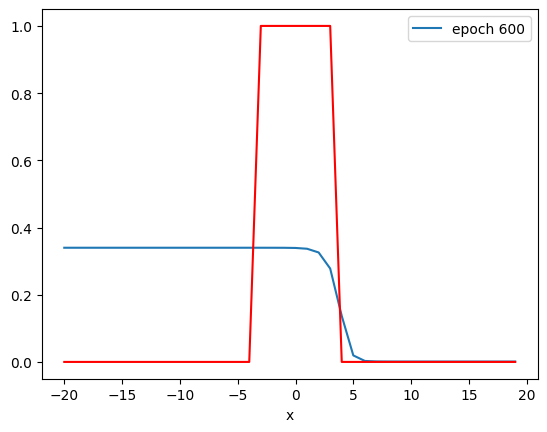

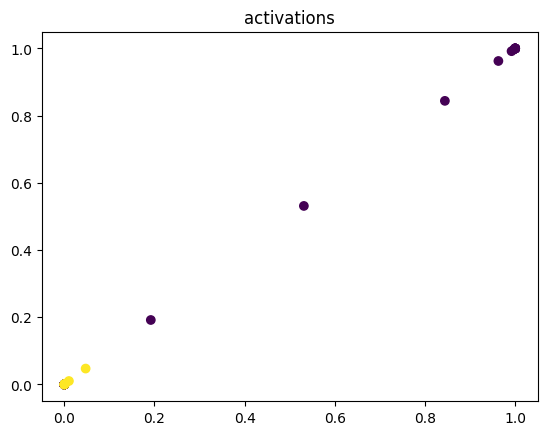

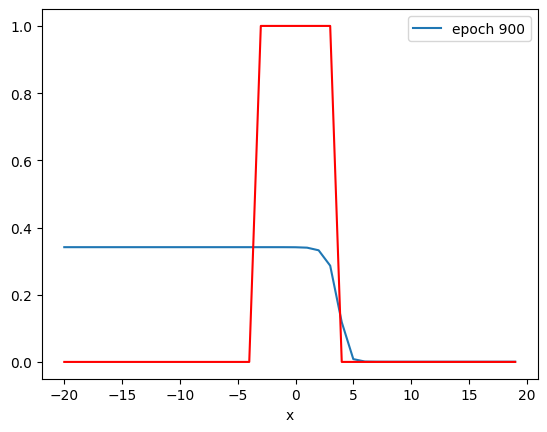

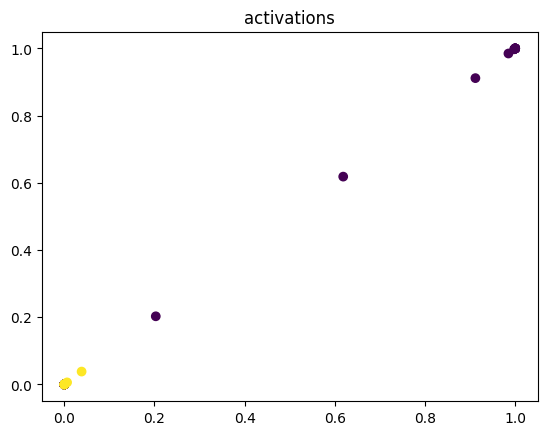

In [ ]:
# train the model
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)
# Observe along visualization steps, how activation doesn't change. 
# It will be verified at the end, that the weights have changed,
# although they don't seem to have caused any impact.

Text(0.5, 1.0, 'cross entropy loss')

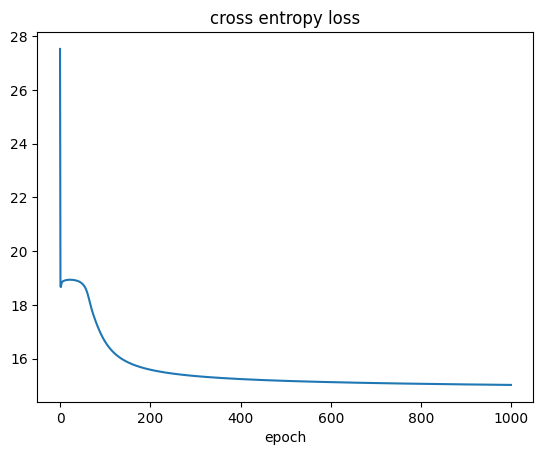

In [14]:
# Plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

In [15]:
# Examine model parameters
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.9340],
                      [1.9340]])),
             ('linear1.bias', tensor([-9.0725, -9.0725])),
             ('linear2.weight', tensor([[-3.3976, -3.3976]])),
             ('linear2.bias', tensor([-0.6546]))])

In [16]:
y_hat = model(torch.tensor([[-2.0],[0.0],[2.0]]))
y_hat

tensor([[0.3420],
        [0.3418],
        [0.3337]], grad_fn=<SigmoidBackward0>)

## <a name="results" id="results">Exploring MSE as loss criterion</a>

/home/cristina/work/mine/coursera/ai_ml_study_resources/.venv/lib/python3.12/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


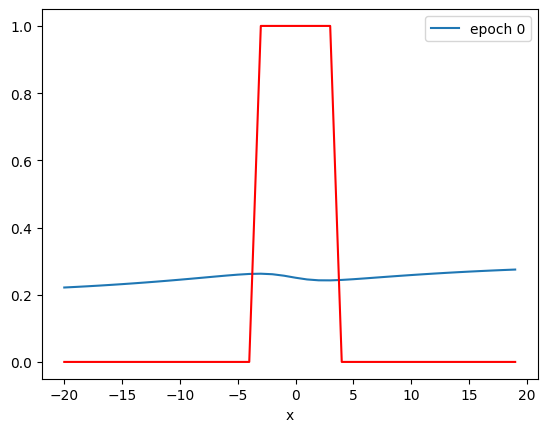

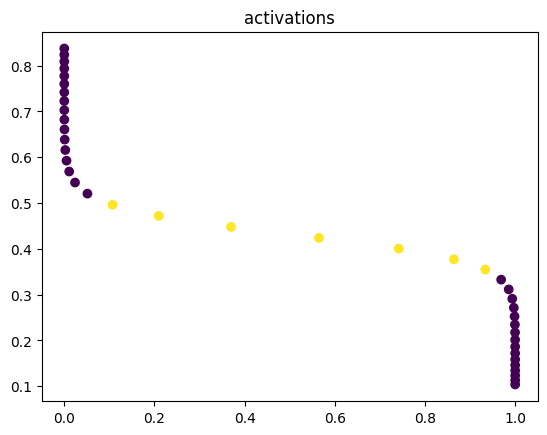

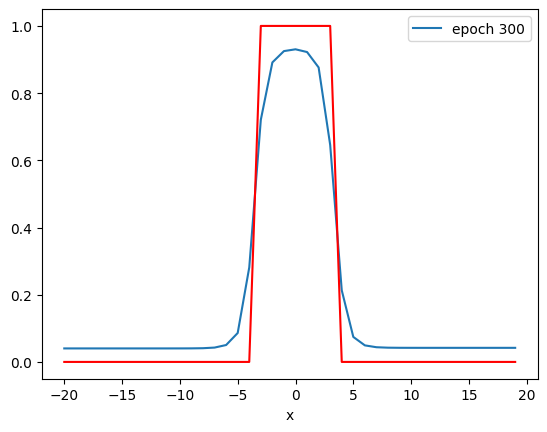

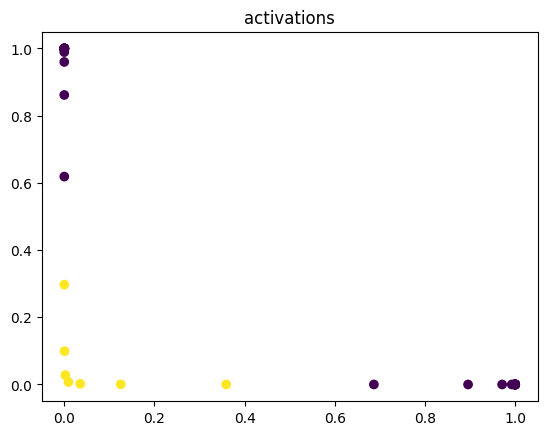

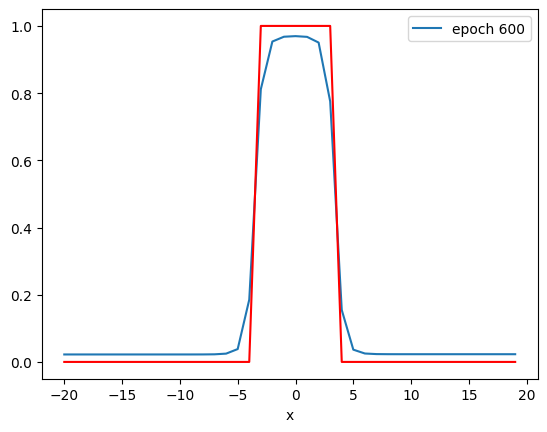

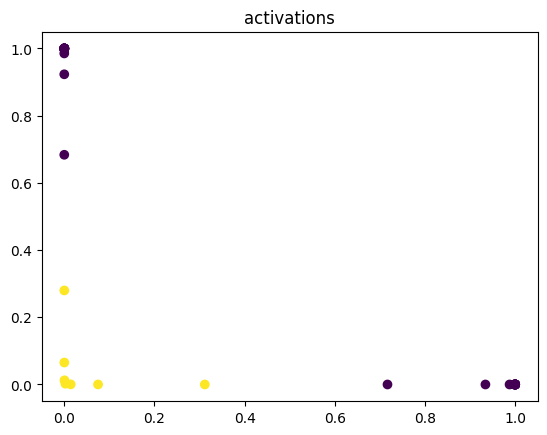

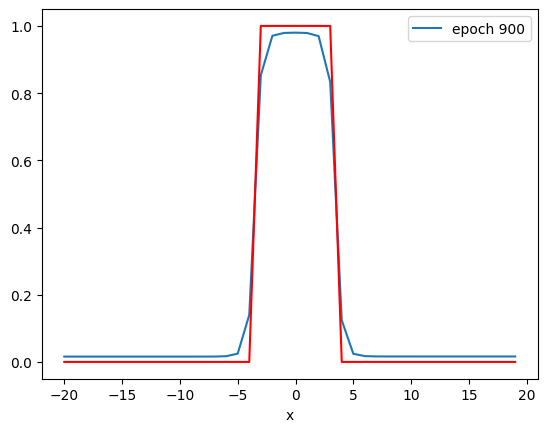

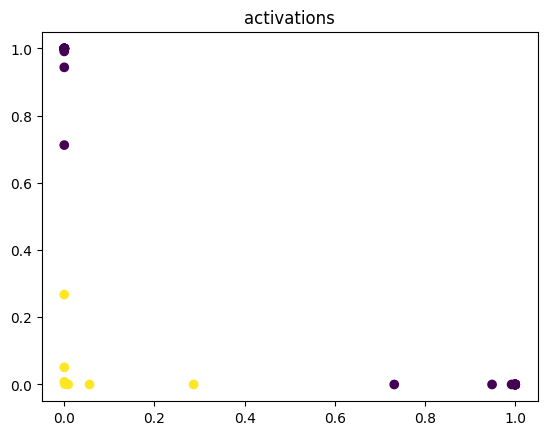

In [17]:
### You can repeat the process using with MSE cost
# Train the model
# size of input 
D_in = 1
# size of hidden layer 
H = 2
# number of outputs 
D_out = 1

# learning rate 
learning_rate = 0.1
# create the model 
model = Net(D_in, H, D_out)
criterion_mse = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# retrain
cost_mse = train(Y, X, model, optimizer, criterion_mse, epochs=1000)

Text(0.5, 1.0, 'MSE loss ')

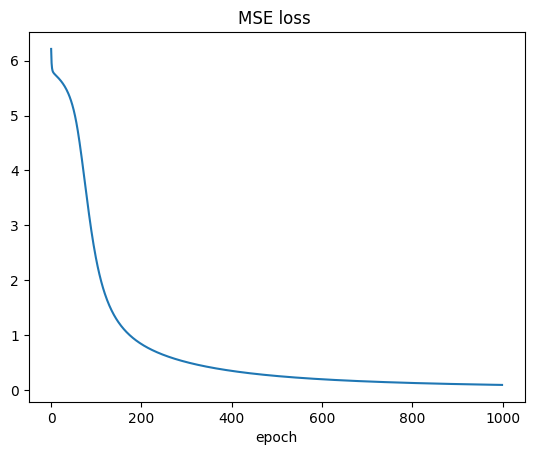

In [18]:
plt.plot(cost_mse)
plt.xlabel('epoch')
plt.title('MSE loss ')